In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import json

In [6]:
with open('myInfra.json', 'r') as f:
  infra = json.load(f)
with open('mySim.json', 'r') as f:
  simulation = json.load(f)
with open('r.json', 'r') as f:
  results = json.load(f)

In [7]:
type(infra)

dict

In [117]:
routes = [route['id'] for route in infra['routes']]

In [118]:
routes

['rt.D0->D2',
 'rt.buffer_stop.0->D0',
 'rt.D1->D2',
 'rt.buffer_stop.1->D1',
 'rt.D2->D3',
 'rt.D3->buffer_stop.2']

In [119]:
simulation.keys()
simulation['train_schedules'][0]['routes']

['rt.buffer_stop.0->D0', 'rt.D0->D2', 'rt.D2->D3']

In [120]:
routes

['rt.D0->D2',
 'rt.buffer_stop.0->D0',
 'rt.D1->D2',
 'rt.buffer_stop.1->D1',
 'rt.D2->D3',
 'rt.D3->buffer_stop.2']

In [121]:
from schedules import Schedule

In [122]:
s = Schedule(len(routes), 2)

In [123]:
for train in (0,1,):#range(s.num_trains):
    route_occupancies = results[train]['base_simulations'][0]['route_occupancies']
    for route, times in route_occupancies.items():
        # print(route, times['time_head_occupy'], times['time_tail_free'])
        idx = routes.index(route)
        s._df.loc[idx, (train, 's')] = times['time_head_occupy']
        s._df.loc[idx, (train, 'e')] = times['time_tail_free']

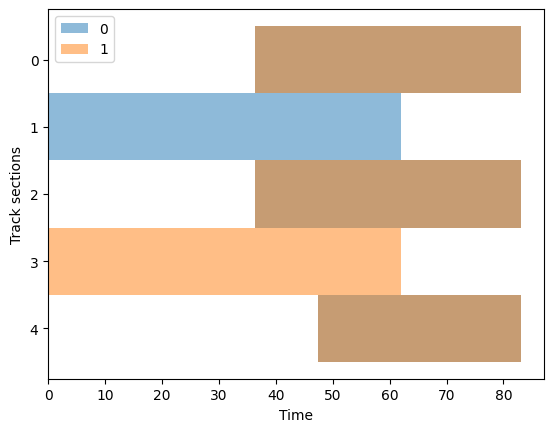

In [124]:
s.plot()

In [162]:
import pandas as pd
mask = ~pd.Series(routes).str.split('->').str[1].duplicated()
pd.Series(routes)[mask]

0               rt.D0->D2
1    rt.buffer_stop.0->D0
3    rt.buffer_stop.1->D1
4               rt.D2->D3
5    rt.D3->buffer_stop.2
dtype: object

In [130]:
s._df = s.df[mask]

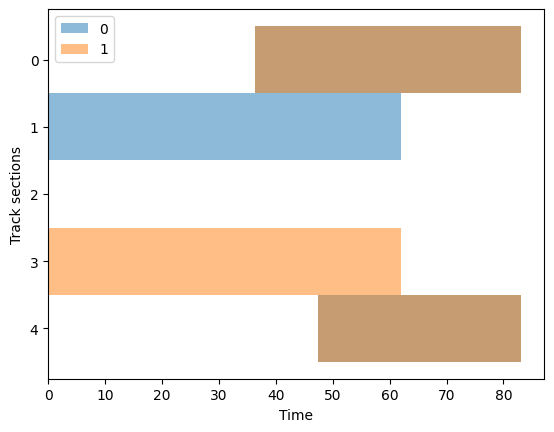

In [144]:
s.plot()


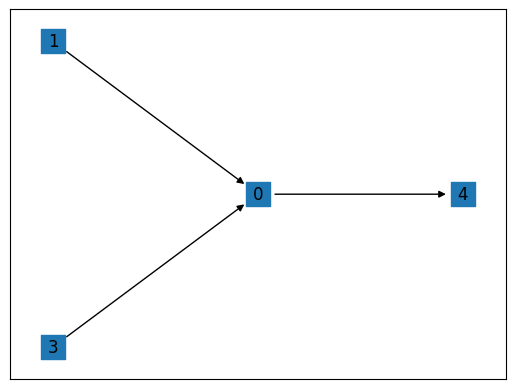

In [145]:
s.draw_graph()

In [142]:
s.df.index.map(dict(zip(range(len(routes)), routes)))

Index(['rt.D0->D2', 'rt.buffer_stop.0->D0', 'rt.buffer_stop.1->D1',
       'rt.D2->D3', 'rt.D3->buffer_stop.2'],
      dtype='object')

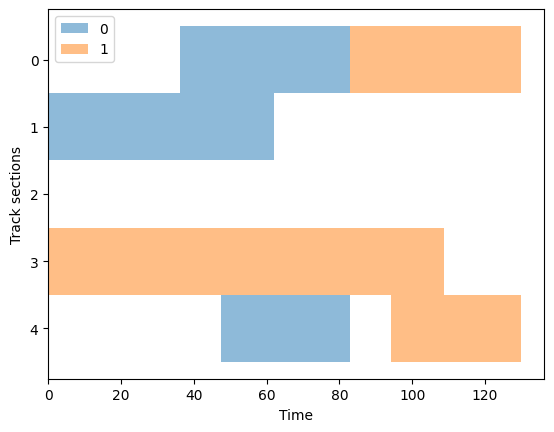

In [157]:
s.shift_train_after(1,0,0).plot()

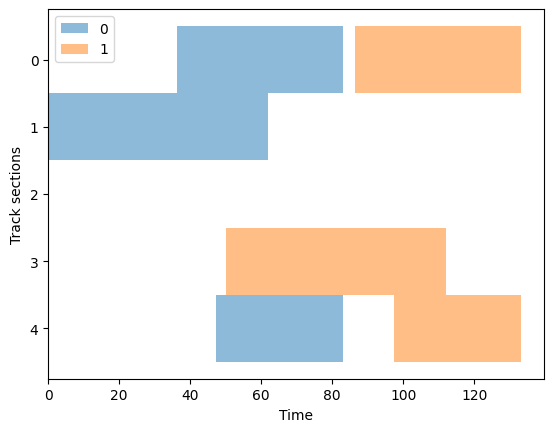

In [172]:
s.shift_train_departure(1, 50).plot()